# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

Let's start by loading and viewing the data.

In [1]:
import pandas as pd

df_flights = pd.read_csv('data/flights.csv')
df_flights.head()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


The dataset contains observations of US domestic flights in 2013, and consists of the following fields:

- **Year**: The year of the flight (all records are from 2013)
- **Month**: The month of the flight
- **DayofMonth**: The day of the month on which the flight departed
- **DayOfWeek**: The day of the week on which the flight departed - from 1 (Monday) to 7 (Sunday)
- **Carrier**: The two-letter abbreviation for the airline.
- **OriginAirportID**: A unique numeric identifier for the departure aiport
- **OriginAirportName**: The full name of the departure airport
- **OriginCity**: The departure airport city
- **OriginState**: The departure airport state
- **DestAirportID**: A unique numeric identifier for the destination aiport
- **DestAirportName**: The full name of the destination airport
- **DestCity**: The destination airport city
- **DestState**: The destination airport state
- **CRSDepTime**: The scheduled departure time
- **DepDelay**: The number of minutes departure was delayed (flight that left ahead of schedule have a negative value)
- **DelDelay15**: A binary indicator that departure was delayed by more than 15 minutes (and therefore considered "late")
- **CRSArrTime**: The scheduled arrival time
- **ArrDelay**: The number of minutes arrival was delayed (flight that arrived ahead of schedule have a negative value)
- **ArrDelay15**: A binary indicator that arrival was delayed by more than 15 minutes (and therefore considered "late")
- **Cancelled**: A binary indicator that the flight was cancelled

Your challenge is to explore the flight data to analyze possible factors that affect delays in departure or arrival of a flight.

1. Start by cleaning the data.
    - Identify any null or missing data, and impute appropriate replacement values.
    - Identify and eliminate any outliers in the **DepDelay** and **ArrDelay** columns.
2. Explore the cleaned data.
    - View summary statistics for the numeric fields in the dataset.
    - Determine the distribution of the **DepDelay** and **ArrDelay** columns.
    - Use statistics, aggregate functions, and visualizations to answer the following questions:
        - *What are the average (mean) departure and arrival delays?*
        - *How do the carriers compare in terms of arrival delay performance?*
        - *Is there a noticable difference in arrival delays for different days of the week?*
        - *Which departure airport has the highest average departure delay?*
        - *Do **late** departures tend to result in longer arrival delays than on-time departures?*
        - *Which route (from origin airport to destination airport) has the most **late** arrivals?*
        - *Which route has the highest average arrival delay?*
        
Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [01 - Flights Challenge.ipynb](01%20-%20Flights%20Solution.ipynb).

## 1. Cleaning the data

### a. Identify any null or missing data, and impute appropriate replacement values

In [2]:
df_flights.shape

(271940, 20)

In [3]:
df_flights.isnull()

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271935,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271936,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271937,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
271938,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

We see that most column don't have any missing data, except the "DepDel15" column, which returns a binary indicator that the departure was delayed by more than 15 minutes (and therefore considered "late").

To see these missing values in context, we can filter the dataframe to include only rows where any of the columns (axis 1 of the dataframe) are null.

In [5]:
df_flights[df_flights.isnull().any(axis=1)]

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
171,2013,4,18,4,DL,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,13930,Chicago O'Hare International,Chicago,IL,835,0,NaN,945,0,1,1
359,2013,5,22,3,OO,11433,Detroit Metro Wayne County,Detroit,MI,13930,Chicago O'Hare International,Chicago,IL,1719,0,NaN,1738,0,1,1
429,2013,7,3,3,MQ,13851,Will Rogers World,Oklahoma City,OK,13930,Chicago O'Hare International,Chicago,IL,1935,0,NaN,2125,0,1,1
545,2013,4,13,6,FL,14524,Richmond International,Richmond,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,630,0,NaN,809,0,1,1
554,2013,5,8,3,EV,12953,LaGuardia,New York,NY,11193,Cincinnati/Northern Kentucky International,Cincinnati,OH,1320,0,NaN,1524,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271410,2013,8,5,1,WN,14831,Norman Y. Mineta San Jose International,San Jose,CA,10800,Bob Hope,Burbank,CA,1525,0,NaN,1625,0,1,1
271607,2013,6,18,2,EV,14100,Philadelphia International,Philadelphia,PA,13244,Memphis International,Memphis,TN,600,0,NaN,729,0,1,1
271634,2013,5,8,3,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,14100,Philadelphia International,Philadelphia,PA,1325,0,NaN,1745,0,1,1
271671,2013,10,8,2,WN,12892,Los Angeles International,Los Angeles,CA,12889,McCarran International,Las Vegas,NV,1440,0,NaN,1540,0,1,1


In [6]:
df_small = df_flights[df_flights.isnull().any(axis=1)][['DepDelay', 'DepDel15']]
df_small

,DepDelay,DepDel15
171,0,NaN
359,0,NaN
429,0,NaN
545,0,NaN
554,0,NaN
...,...,...
271410,0,NaN
271607,0,NaN
271634,0,NaN
271671,0,NaN


The "DepDel15" column returns a binary indicator that the departure was delayed by more than 15 minutes (and therefore considered "late").

Let's imput appropriate replacement values for the missing data.

Check if all values of DepDelay are equal to 0.

In [7]:
df_small.loc[(df_small['DepDelay'] == 0)].count()


DepDelay    2761
DepDel15       0
dtype: int64

All values of DepDelay are equal to 0, so we can fill all the missing values in DepDel15 with 0.

In [8]:
df_flights.DepDel15 = df_flights.DepDel15.fillna(0)
df_flights.isnull().sum()


Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
Carrier              0
OriginAirportID      0
OriginAirportName    0
OriginCity           0
OriginState          0
DestAirportID        0
DestAirportName      0
DestCity             0
DestState            0
CRSDepTime           0
DepDelay             0
DepDel15             0
CRSArrTime           0
ArrDelay             0
ArrDel15             0
Cancelled            0
dtype: int64

### b. Identify and eliminate any outliers of the DepDelay and ArrDelay columns

In [9]:
df_flights['DepDelay'].mode()

0   -3
Name: DepDelay, dtype: int64

Minimum:-63.00
Mean:10.35
Median:-1.00
Mode:-3.00
Maximum:1425.00

Minimum:-75.00
Mean:6.50
Median:-3.00
Mode:0.00
Maximum:1440.00



C:\Users\ElisendaGascon\AppData\Local\Temp\ipykernel_28792\2769296604.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ElisendaGascon\AppData\Local\Temp\ipykernel_28792\2769296604.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


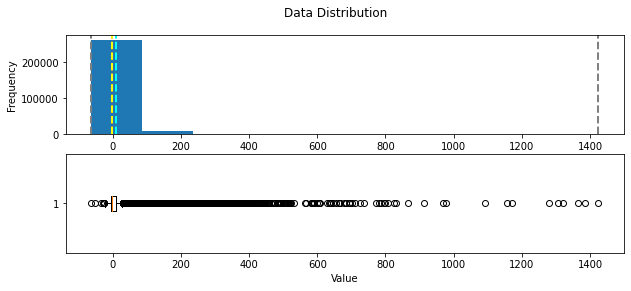

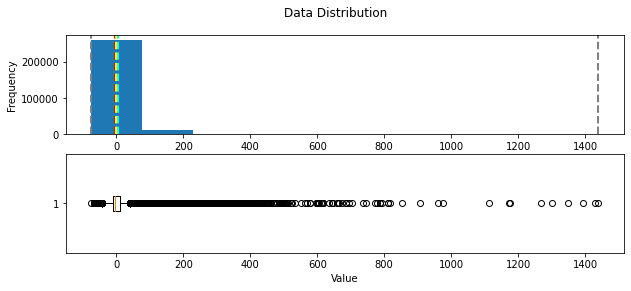

In [10]:
# Create a function that we can re-use
def show_distribution(var_data):
    from matplotlib import pyplot as plt

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                             mean_val,
                                                                                             med_val,
                                                                                             mod_val,
                                                                                             max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()

# Get the variable to examine
var1 = df_flights['DepDelay']
var2 = df_flights['ArrDelay']
# Call the function
show_distribution(var1)
show_distribution(var2)

Lots of outliers on the upper end, sone on the lower end.
Let's only include data within the 1st and 90th percentile.

In [11]:
# DepDelay
DepDelay_q01 = df_flights.DepDelay.quantile(0.01)
DepDelay_q90 = df_flights.DepDelay.quantile(0.90)
df_flights = df_flights[df_flights.DepDelay > DepDelay_q01]
df_flights = df_flights[df_flights.DepDelay < DepDelay_q90]

# ArrDelay
ArrDelay_q01 = df_flights.ArrDelay.quantile(0.01)
ArrDelay_q90 = df_flights.ArrDelay.quantile(0.90)
df_flights = df_flights[df_flights.ArrDelay > ArrDelay_q01]
df_flights = df_flights[df_flights.ArrDelay < ArrDelay_q90]

Minimum:-11.00
Mean:-0.13
Median:-2.00
Mode:-3.00
Maximum:36.00

Minimum:-32.00
Mean:-5.68
Median:-6.00
Mode:0.00
Maximum:16.00



C:\Users\ElisendaGascon\AppData\Local\Temp\ipykernel_28792\2769296604.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\ElisendaGascon\AppData\Local\Temp\ipykernel_28792\2769296604.py:40: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


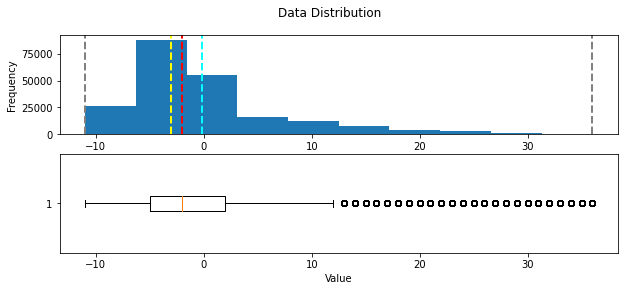

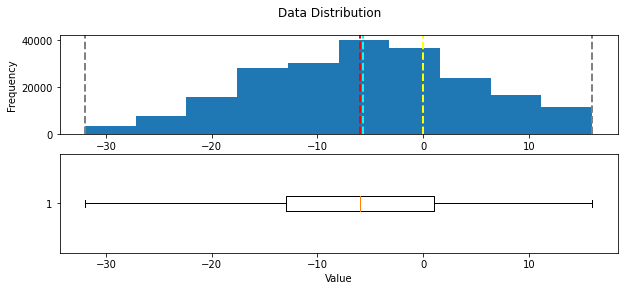

In [12]:
# Show the distributions
var1 = df_flights['DepDelay']
var2 = df_flights['ArrDelay']
show_distribution(var1)
show_distribution(var2)

## Explore the clean data

a. View summary statistics for the numeric fields in the dataset.

In [13]:
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,214500.0,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000,214500.000000
mean,2013.0,7.027296,15.799389,3.904168,12755.329371,12734.206438,1284.230942,-0.130452,0.057604,1465.878522,-5.680522,0.032597,0.013305
std,0.0,2.006267,8.853235,1.998344,1512.139480,1506.103555,470.230018,7.260672,0.232993,487.646410,10.188473,0.177579,0.114579
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-11.000000,0.000000,1.000000,-32.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,853.000000,-5.000000,0.000000,1055.000000,-13.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1240.000000,-2.000000,0.000000,1448.000000,-6.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14100.000000,14057.000000,1658.000000,2.000000,0.000000,1850.000000,1.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,36.000000,1.000000,2359.000000,16.000000,1.000000,1.000000


### What are the average (mean) departure and arrival delays?

In [14]:
delay_cols = ['DepDelay', 'ArrDelay']

df_flights[delay_cols].mean()


DepDelay   -0.130452
ArrDelay   -5.680522
dtype: float64

### How do the carriers compare in terms of arrival delay performance?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='Carrier'>

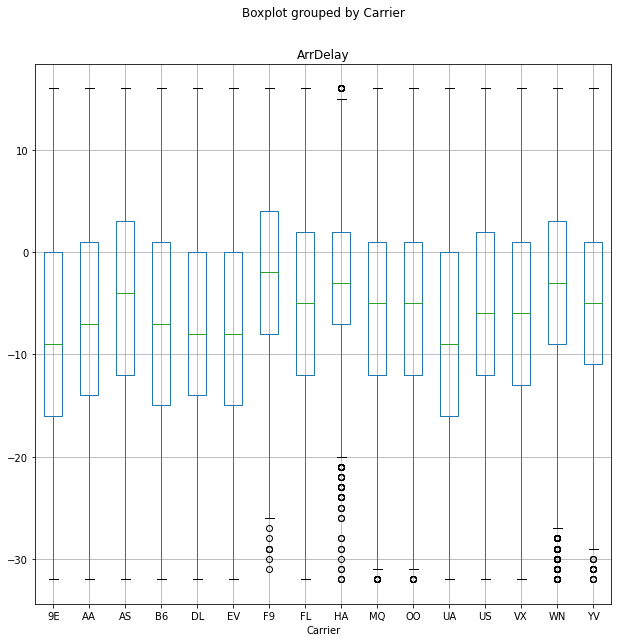

In [15]:
df_flights.boxplot(column=['ArrDelay'], by='Carrier', figsize=(10, 10))

### Are some days of the week more prone to arrival days than others?

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DayOfWeek'>

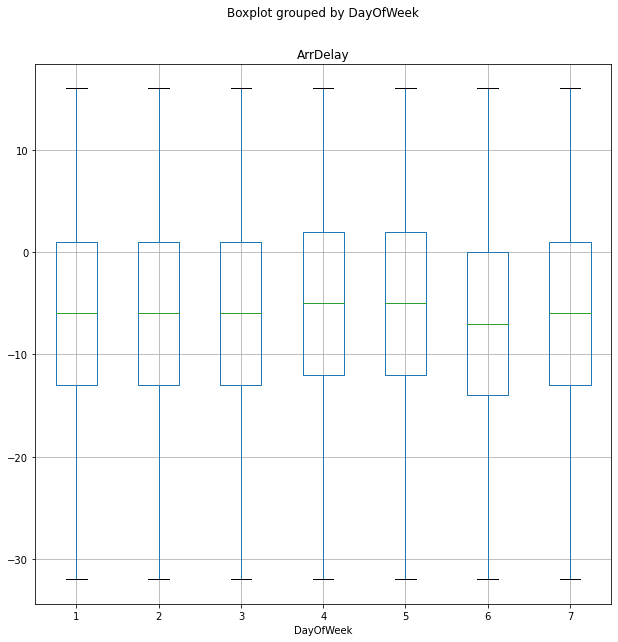

In [16]:
df_flights.boxplot(column=['ArrDelay'], by='DayOfWeek', figsize=(10, 10))

### Which departure airport has the highest average departure delay?

,DepDelay
OriginAirportName,
Chicago Midway International,3.865294
Dallas Love Field,3.039141
William P Hobby,2.706247
Denver International,1.863804
Baltimore/Washington International Thurgood Marshall,1.805401
...,...
Tucson International,-2.522114
Richmond International,-2.665944
Ted Stevens Anchorage International,-2.886700


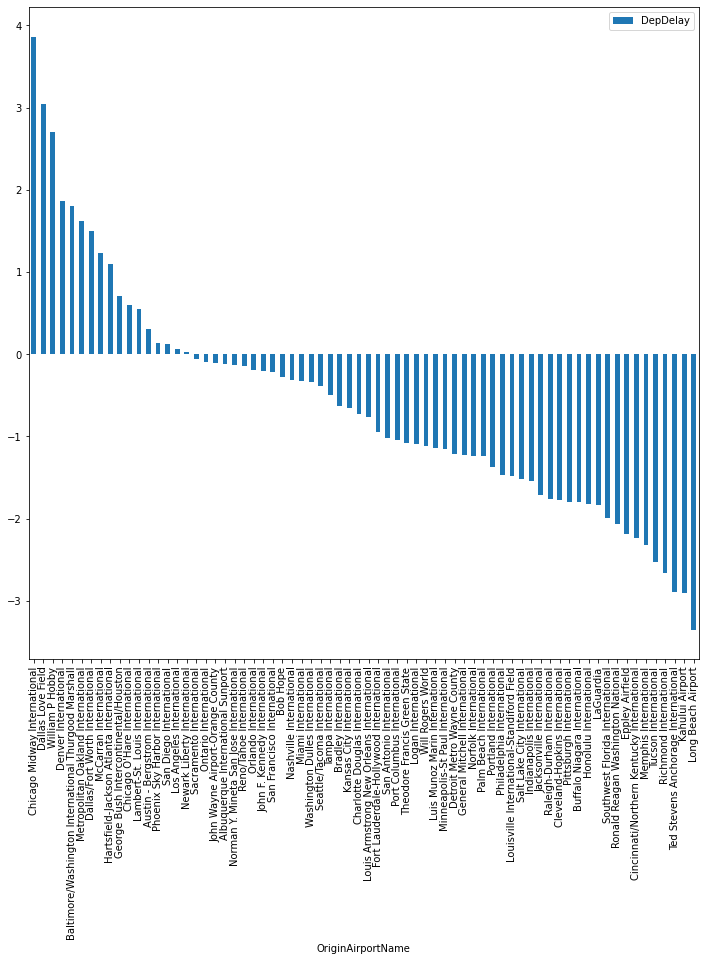

In [17]:
departure_airport_group = df_flights.groupby(df_flights.OriginAirportName)

mean_departure_delays = pd.DataFrame(departure_airport_group['DepDelay'].mean()).sort_values('DepDelay', ascending=False)
mean_departure_delays.plot(kind = "bar", figsize=(12,12))
mean_departure_delays

### Do late departures tend to result in longer arrival delays than on-time departures?

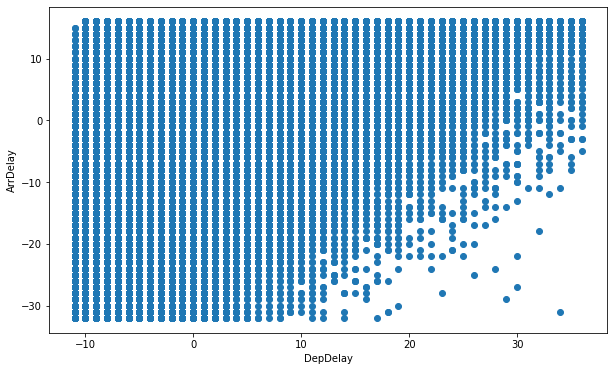

In [18]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_flights['DepDelay'], y = df_flights['ArrDelay'])
plt.xlabel("DepDelay")
plt.ylabel("ArrDelay")

plt.show()

<AxesSubplot:title={'center':'ArrDelay'}, xlabel='DepDel15'>

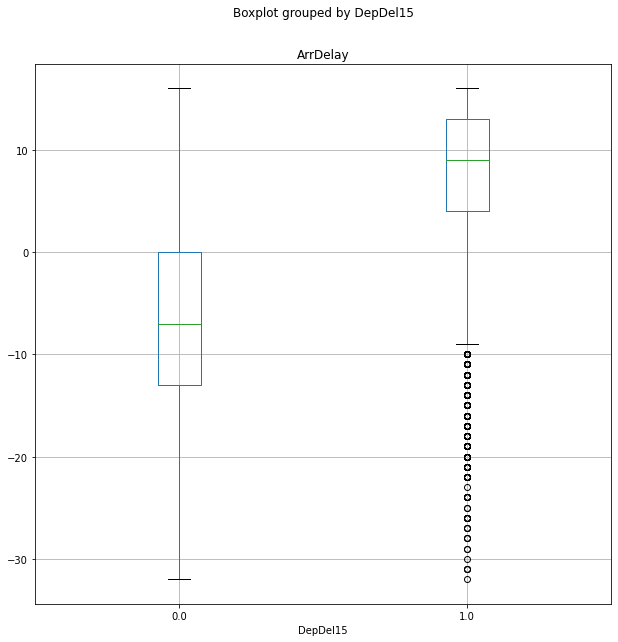

In [19]:
df_flights.boxplot(column='ArrDelay', by='DepDel15', figsize=(10, 10))

### Which route (from origin airport to destination airport) has the most late arrivals?

In [20]:
# Add a routes column
routes  = pd.Series(df_flights['OriginAirportName'] + ' > ' + df_flights['DestAirportName'])
df_flights = pd.concat([df_flights, routes.rename("Route")], axis=1)

# Group by routes
route_group = df_flights.groupby(df_flights.Route)
late_arrivals = pd.DataFrame(route_group['ArrDel15'].sum()).sort_values('ArrDel15', ascending=False)
#late_arrivals.plot(kind = "bar", figsize=(40,12))
late_arrivals



,ArrDel15
Route,
San Francisco International > Los Angeles International,67
Los Angeles International > San Francisco International,42
Detroit Metro Wayne County > Chicago O'Hare International,29
LaGuardia > Logan International,29
LaGuardia > Chicago O'Hare International,27
...,...
Norman Y. Mineta San Jose International > Honolulu International,0
Norman Y. Mineta San Jose International > Hartsfield-Jackson Atlanta International,0
Norman Y. Mineta San Jose International > George Bush Intercontinental/Houston,0


### Which route has the highest average arrival delay?

In [21]:
avg_arrival_delay = pd.DataFrame(route_group['ArrDelay'].mean()).sort_values('ArrDelay', ascending=False)
# avg_arrival_delay.plot(kind = "bar", figsize=(20,12))
avg_arrival_delay

,ArrDelay
Route,
Theodore Francis Green State > Southwest Florida International,12.000000
Charlotte Douglas International > General Mitchell International,10.000000
Indianapolis International > Philadelphia International,10.000000
Port Columbus International > Logan International,7.000000
Cleveland-Hopkins International > Philadelphia International,7.000000
...,...
Lambert-St. Louis International > Cleveland-Hopkins International,-20.000000
Jacksonville International > Chicago Midway International,-20.000000
Eppley Airfield > LaGuardia,-20.750000
